In [1]:
from pylab import *
from scipy.stats import multivariate_normal
%matplotlib inline

In [2]:
def get_r(beta_mean, beta_covar, nsample = 100000):
    kdim = beta_mean.size
    c = np.linalg.cholesky( beta_covar)
    z = np.random.normal(size=(kdim,nsample))
    y = beta_mean.reshape(kdim,1) + c.dot(z)
    
    r_mean = np.array([ beta_mean[2]/beta_mean[0], beta_mean[2]/beta_mean[1]])
    r_covar = np.cov(np.stack([y[2]/y[0], y[2]/y[1]]))
    return r_mean, r_covar
  
def get_r_pdf(beta_mean,beta_covar):
    r_mean, r_covar = get_r(beta_mean,beta_covar)
    r_pdf = multivariate_normal(r_mean, r_covar)
    return r_pdf, r_mean, r_covar


In [3]:
# pdg
pdg_beta_mean = np.array([10.71, 10.63, 11.38])
pdg_beta_std  = np.array([0.16, 0.15, 0.21])
pdg_beta_corr = array([[ 1.00, 0.14,-0.20], [ 0.14, 1.00,-0.12], [-0.20,-0.12, 1.00]]) 
# pdg_beta_corr = array([[1.,0.595,0.097],[0.595,1.,-0.096],[0.097,-0.096,1.]])  
pdg_beta_covar = np.outer(pdg_beta_std, pdg_beta_std)*pdg_beta_corr
pdg_rpdf, pdg_rmean, pdg_rcovar = get_r_pdf(pdg_beta_mean, pdg_beta_covar)

In [4]:
# cms shape
cmsshape_beta_mean = np.array([10.77,10.91 ,10.89,67.42])
cmsshape_beta_std  = np.array([0.10,0.08 ,0.21,0.28])
cmsshape_beta_corr = np.array([[1.,0.439,0.138,-0.585],[0.439,1.,0.190,-0.581],[0.138,0.190,1.,-0.844],[-0.585,-0.581,-0.844,1.]])
cmsshape_beta_covar = np.outer(cmsshape_beta_std, cmsshape_beta_std)*cmsshape_beta_corr
cmsshape_rpdf, cmsshape_rmean, cmsshape_rcovar = get_r_pdf(cmsshape_beta_mean, cmsshape_beta_covar)

In [5]:
# cms counting
cmscounting_beta_mean = array([11.14800394, 11.13377685, 10.63446616])
cmscounting_beta_covar = array([[ 0.07373008,  0.03392898, -0.01059741],[ 0.03392898,  0.04704586, -0.03741042],[-0.01059741, -0.03741042,  0.42297806]])
cmscounting_rpdf, cmscounting_rmean, cmscounting_rcovar = get_r_pdf(cmscounting_beta_mean, cmscounting_beta_covar)

In [6]:
# standard model
sm_rmean = np.array([0.999, 0.999])

In [7]:
hw, N = 0.2, 4000
x,y = np.linspace(1.0-hw, 1.0+hw, N),np.linspace(1.0-hw, 1.0+hw, N)
dxdy = (x[1]-x[0])* (y[1]-y[0])
X, Y = np.meshgrid(x, y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


pdg_nll  = -pdg_rpdf.logpdf(pos) + pdg_rpdf.logpdf(pdg_rmean)
cmsshape_nll  = -cmsshape_rpdf.logpdf(pos) + cmsshape_rpdf.logpdf(cmsshape_rmean)
cmscounting_nll  = -cmscounting_rpdf.logpdf(pos) + cmscounting_rpdf.logpdf(cmscounting_rmean)


In [8]:
Z, sm_z = pdg_rpdf.pdf(pos), pdg_rpdf.pdf(sm_rmean)
pdg_pvalue = 1 - (Z[Z>sm_z].sum() * dxdy)
print("pdg_pvalue", pdg_pvalue)

Z, sm_z = cmsshape_rpdf.pdf(pos), cmsshape_rpdf.pdf(sm_rmean)
cmsshape_pvalue = 1 - (Z[Z>sm_z].sum() * dxdy)
print("cmsshape_pvalue", cmsshape_pvalue)

Z, sm_z = cmscounting_rpdf.pdf(pos), cmscounting_rpdf.pdf(sm_rmean)
cmscounting_pvalue = 1 - (Z[Z>sm_z].sum() * dxdy)
print("cmscounting_pvalue", cmscounting_pvalue)

pdg_pvalue 0.02183826454418558
cmsshape_pvalue 0.3533880545071878
cmscounting_pvalue 0.7816807574023683


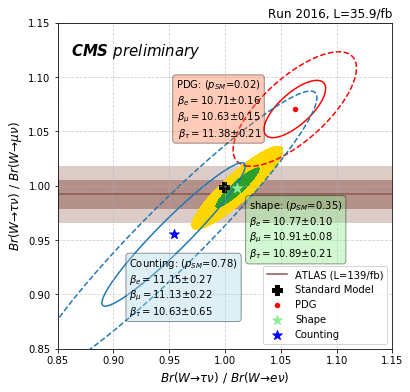

In [9]:
fig, ax = plt.subplots(figsize=(6,6),facecolor='w')

plt.scatter(0.999,0.999,color='k',marker='P',s=100,label="Standard Model",zorder=1)

plt.scatter(pdg_rmean[0],pdg_rmean[1],color='r',marker='o',s=20,label="PDG",zorder=3)
plt.scatter(cmsshape_rmean[0], cmsshape_rmean[1],color='lightgreen',marker='*',s=100,label="Shape",zorder=3)
plt.scatter(cmscounting_rmean[0],cmscounting_rmean[1],color='b',marker='*',s=100,label="Counting",zorder=3)

plt.contour(X, Y, pdg_nll,[ 0.5, 2],colors=["red","red"],alpha=1,linestyles=["-","--"],zorder=1)
plt.contourf(X, Y, cmsshape_nll,   [ 0,0.5, 2],colors=["C2","gold"],alpha=1,zorder=0)
plt.contour(X, Y, cmscounting_nll,[0.5, 2],colors=["C0","C0"],linestyles=["-","--"],alpha=1,zorder=1)


plt.axhline(0.992,c="C5",alpha=1, label="ATLAS (L=139/fb)",zorder=-1)
plt.axhspan(0.992-0.013,   0.992+0.013,   facecolor="C5",alpha=0.5,zorder=-2)
plt.axhspan(0.992-0.013*2, 0.992+0.013*2, facecolor="C5",alpha=0.3,zorder=-3)




plt.legend(loc="lower right",fontsize=10)
plt.grid(linestyle="--",alpha=0.6)
plt.xlim(0.85,1.15)
plt.ylim(0.85,1.15)
plt.xlabel(r"$Br(W\to \tau\nu)$ / $Br(W\to e\nu) $",fontsize=12)
plt.ylabel(r"$Br(W\to \tau \nu)$ / $Br(W\to \mu\nu) $",fontsize=12)
plt.text(0.04, 0.9, r'CMS $preliminary$', style='italic', fontsize='15', fontweight='bold', transform=ax.transAxes)
plt.title("Run 2016, L=35.9/fb", loc='right', fontsize='12')

plt.savefig('../plots/combine/r.png',dpi=300)
plt.savefig('../plots/combine/r.pdf')


# show beta

pdgbetaText = "PDG: " +r"($p_{SM}$="+ "{:4.2f})".format(pdg_pvalue)
pdgbetaText = pdgbetaText +" \n" + r"$\beta_{e}   =$" + r"{:4.2f}$\pm${:4.2f}".format(pdg_beta_mean[0],pdg_beta_covar[0,0]**0.5)
pdgbetaText = pdgbetaText +" \n" + r"$\beta_{\mu} =$" + r"{:4.2f}$\pm${:4.2f}".format(pdg_beta_mean[1],pdg_beta_covar[1,1]**0.5)
pdgbetaText = pdgbetaText +" \n" + r"$\beta_{\tau}=$" + r"{:4.2f}$\pm${:4.2f}".format(pdg_beta_mean[2],pdg_beta_covar[2,2]**0.5)
props = dict(boxstyle='round', facecolor='coral', alpha=0.4, edgecolor="k")
plt.text(pdg_rmean[0]-0.03, pdg_rmean[1],pdgbetaText, verticalalignment='center',horizontalalignment='right', bbox=props)

betaText = "shape: " +r"($p_{SM}$="+ "{:4.2f})".format(cmsshape_pvalue)
betaText = betaText +" \n" + r"$\beta_{e}   =$" + r"{:4.2f}$\pm${:4.2f}".format(cmsshape_beta_mean[0],cmsshape_beta_covar[0,0]**0.5)
betaText = betaText +" \n" + r"$\beta_{\mu} =$" + r"{:4.2f}$\pm${:4.2f}".format(cmsshape_beta_mean[1],cmsshape_beta_covar[1,1]**0.5)
betaText = betaText +" \n" + r"$\beta_{\tau}=$" + r"{:4.2f}$\pm${:4.2f}".format(cmsshape_beta_mean[2],cmsshape_beta_covar[2,2]**0.5)
props = dict(boxstyle='round', facecolor='lightgreen', alpha=0.4, edgecolor="k")
plt.text(cmsshape_rmean[0]+0.01, cmsshape_rmean[1]-0.01, betaText, verticalalignment='top', horizontalalignment='left', bbox=props)

betaText = "Counting: " +r"($p_{SM}$="+ "{:4.2f})".format(cmscounting_pvalue)
betaText = betaText +" \n" + r"$\beta_{e}   =$" + r"{:4.2f}$\pm${:4.2f}".format(cmscounting_beta_mean[0],cmscounting_beta_covar[0,0]**0.5)
betaText = betaText +" \n" + r"$\beta_{\mu} =$" + r"{:4.2f}$\pm${:4.2f}".format(cmscounting_beta_mean[1],cmscounting_beta_covar[1,1]**0.5)
betaText = betaText +" \n" + r"$\beta_{\tau}=$" + r"{:4.2f}$\pm${:4.2f}".format(cmscounting_beta_mean[2],cmscounting_beta_covar[2,2]**0.5)
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.4, edgecolor="k")
plt.text(cmscounting_rmean[0]-0.04, cmscounting_rmean[1]-0.02, betaText, verticalalignment='top', horizontalalignment='left', bbox=props)


plt.savefig('../plots/combine/r2.png',dpi=300)
plt.savefig('../plots/combine/r2.pdf')